In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pickle

with open("df_time_tshisola_C103_DG4.obj", "rb") as f:
    lyingData = pickle.load(f)

In [3]:
lyingData.columns = lyingData.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
lyingData.columns

Index(['pig_lying', 'pig_not_lying'], dtype='object', name='detection_classes')

In [5]:
lyingData.reset_index(level=0, inplace=True)

In [6]:
lyingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22242 entries, 0 to 22241
Data columns (total 3 columns):
detection_time    22242 non-null object
pig_lying         22242 non-null int64
pig_not_lying     22242 non-null int64
dtypes: int64(2), object(1)
memory usage: 521.4+ KB


In [7]:
lyingData.detection_time.unique()
lyingData["detection_time"].unique()

array(['2018-10-02 13:15:51', '2018-10-02 13:15:54',
       '2018-10-02 13:15:56', ..., '2018-12-30 23:01:30',
       '2018-12-30 23:01:32', '2018-12-30 23:01:37'], dtype=object)

In [8]:
lyingData["detection_time"] = pd.to_datetime(
    lyingData["detection_time"], 
    format = "%Y-%m-%d %H:%M:%S", 
    errors = "coerce"
)

In [9]:
lyingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22242 entries, 0 to 22241
Data columns (total 3 columns):
detection_time    22242 non-null datetime64[ns]
pig_lying         22242 non-null int64
pig_not_lying     22242 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 521.4 KB


In [10]:
lyingData["number_of_pigs"] = lyingData["pig_lying"] + lyingData["pig_not_lying"]
lyingData.head()

detection_classes,detection_time,pig_lying,pig_not_lying,number_of_pigs
0,2018-10-02 13:15:51,3,15,18
1,2018-10-02 13:15:54,3,16,19
2,2018-10-02 13:15:56,1,16,17
3,2018-10-02 13:15:58,0,15,15
4,2018-10-02 13:15:59,1,18,19


In [11]:
lyingData["date"] = lyingData["detection_time"].dt.date
lyingData["hour"] = lyingData["detection_time"].dt.hour
lyingData["date_hour"] = lyingData["date"].astype(str) + " " + lyingData["hour"].astype(str)
lyingData.head(20)

detection_classes,detection_time,pig_lying,pig_not_lying,number_of_pigs,date,hour,date_hour
0,2018-10-02 13:15:51,3,15,18,2018-10-02,13,2018-10-02 13
1,2018-10-02 13:15:54,3,16,19,2018-10-02,13,2018-10-02 13
2,2018-10-02 13:15:56,1,16,17,2018-10-02,13,2018-10-02 13
3,2018-10-02 13:15:58,0,15,15,2018-10-02,13,2018-10-02 13
4,2018-10-02 13:15:59,1,18,19,2018-10-02,13,2018-10-02 13
5,2018-10-02 13:16:01,2,14,16,2018-10-02,13,2018-10-02 13
6,2018-10-02 13:16:04,7,11,18,2018-10-02,13,2018-10-02 13
7,2018-10-02 13:16:12,2,16,18,2018-10-02,13,2018-10-02 13
8,2018-10-02 13:16:14,1,17,18,2018-10-02,13,2018-10-02 13
9,2018-10-02 13:16:23,6,9,15,2018-10-02,13,2018-10-02 13


In [12]:
lyingData["date_hour"] == "2018-10-02 13"

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
22212    False
22213    False
22214    False
22215    False
22216    False
22217    False
22218    False
22219    False
22220    False
22221    False
22222    False
22223    False
22224    False
22225    False
22226    False
22227    False
22228    False
22229    False
22230    False
22231    False
22232    False
22233    False
22234    False
22235    False
22236    False
22237    False
22238    False
22239    False
22240    False
22241    False
Name: date_hour, Length: 22242, dtype: bool

In [13]:
lyingData.pig_lying[lyingData["date_hour"] == "2018-10-02 13"].mean()

3.0

In [14]:
avgByHour_pig_lying = lyingData.groupby("date_hour").mean()
avgByHour_pig_lying.head()

detection_classes,pig_lying,pig_not_lying,number_of_pigs,hour
date_hour,,,,
2018-10-02 13,3.000000,15.727273,18.727273,13.0
2018-10-02 14,13.200000,7.000000,20.200000,14.0
2018-10-02 15,13.666667,9.444444,23.111111,15.0
2018-10-02 16,11.300000,8.300000,19.600000,16.0
2018-10-02 17,12.916667,4.916667,17.833333,17.0


In [15]:
hourlyLyingData = pd.DataFrame()
#hourlyLyingData = pd.DataFrame(np.array(lyingData.date_hour.unique()), 
#                               columns = ["date_hour"] )
#hourlyLyingData.head()
#hourlyLyingData = pd.merge(hourlyLyingData, avgByHour_pig_lying, 
#                           how="inner", on=["date_hour"])
hourlyLyingData = avgByHour_pig_lying.reset_index(level=0)

In [16]:
hourlyLyingData.head()

detection_classes,date_hour,pig_lying,pig_not_lying,number_of_pigs,hour
0,2018-10-02 13,3.000000,15.727273,18.727273,13.0
1,2018-10-02 14,13.200000,7.000000,20.200000,14.0
2,2018-10-02 15,13.666667,9.444444,23.111111,15.0
3,2018-10-02 16,11.300000,8.300000,19.600000,16.0
4,2018-10-02 17,12.916667,4.916667,17.833333,17.0


In [17]:
hourlyLyingData[hourlyLyingData["date_hour"] == "2018-12-30 0"]

detection_classes,date_hour,pig_lying,pig_not_lying,number_of_pigs,hour
2123,2018-12-30 0,14.8,0.3,15.1,0.0


# Temperature data

In [18]:
temperatureDataPath = "/home/steve/Desktop/mnt/DATA/svenja_data/"

In [19]:
def readTemperatureData (path, sheetName, column, room):
    df = pd.DataFrame()
    for file in os.listdir(path):
        filename = os.fsdecode(file)
        if filename.endswith(".xlsx") and filename.startswith("Temperature " + room):
            data = pd.read_excel(path + filename, 
                                 sheetName, 
                                 usecols = column,
                                 sort=False)
            #data["day"] = data["day"].apply(lambda x: data["day"][:10])
            #data = data.dropna(subset = ["day", "time"])
            data["date_time"] = data['day'].astype(str) + ' ' + data['time'].astype(str)
            data["date_time"] =pd.to_datetime(data["date_time"], errors = "coerce")
            pen = data.columns[2]
            data["pen"] = pen
            data.rename(columns={ data.columns[2]: sheetName.split(" ")[0] + "_temp" }, inplace=True)
            data=data.rename({})
            df = df.append(data)
    return df 

In [20]:
def formatTemperatureData(listOfTemperatureDataDf):
    import pandas as pd
    mergedDf = pd.DataFrame()
    for position in range(len(listOfTemperatureDataDf)):
        df = listOfTemperatureDataDf[position]
        df = df.reset_index(level=0)
        #df["date_time"] = df["date_time"].dt.strftime("%Y-%m-%d %H:%M:%S")
        df = df.drop(["day", "time"], axis = 1)
        if mergedDf.empty:
            mergedDf = df
        else:
            mergedDf = pd.merge(
                mergedDf, df, 
                how = "outer",
                on = ["date_time", "pen"]
            )
            mergedDf = mergedDf.drop(["index_x", "index_y"], axis = 1)
        pen_column = mergedDf["pen"]
        mergedDf = mergedDf.drop(["pen"], axis = 1)
        mergedDf.insert(0, "pen", pen_column)
    date_time_column = pd.to_datetime(mergedDf["date_time"], errors = "coerce")
    mergedDf = mergedDf.drop(["date_time"], axis = 1)
    mergedDf.insert(0, "date_time", date_time_column)
    return mergedDf  

In [21]:
def addDateHourColumn(dataDf, columnNameDateTime):
    dataDf0 = dataDf.copy(deep = True)
    dataDf0["date"] = dataDf0[columnNameDateTime].dt.date
    dataDf0["hour"] = dataDf0[columnNameDateTime].dt.hour
    dataDf0["date_hour"] = dataDf0["date"].astype(str) + " " + dataDf0["hour"].astype(str)
    return dataDf0

In [22]:
#df_C103_lying_p3 = readTemperatureData(temperatureDataPath, "lying area period 3", "A:B,D", "C1")
df_C103_lying_p4 = readTemperatureData(temperatureDataPath, "lying area period 4", "A:B,D", "C1")
#df_C103_room_p3 = readTemperatureData(temperatureDataPath, "room temperature period 3", "A:B,D", "C1")
df_C103_room_p4 = readTemperatureData(temperatureDataPath, "room temperature period 4", "A:B,D", "C1")

In [23]:
#frames_p3 = [df_C103_lying_p3,
#             df_C103_room_p3]
frames_p4 = [df_C103_lying_p4,
             df_C103_room_p4]

In [24]:
df_C103_lying_p4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129600 entries, 0 to 129599
Data columns (total 5 columns):
day           129600 non-null datetime64[ns]
time          129600 non-null object
lying_temp    129600 non-null float64
date_time     129600 non-null datetime64[ns]
pen           129600 non-null object
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 5.9+ MB


In [25]:
df_C103_lying_p4.head()

,day,time,lying_temp,date_time,pen
0,2018-10-02,00:00:00,23.8,2018-10-02 00:00:00,C103
1,2018-10-02,00:01:00,23.8,2018-10-02 00:01:00,C103
2,2018-10-02,00:02:00,23.8,2018-10-02 00:02:00,C103
3,2018-10-02,00:03:00,23.8,2018-10-02 00:03:00,C103
4,2018-10-02,00:04:00,23.8,2018-10-02 00:04:00,C103


In [26]:
df_C103_lying_p4.date_time.unique()

array(['2018-10-02T00:00:00.000000000', '2018-10-02T00:01:00.000000000',
       '2018-10-02T00:02:00.000000000', ...,
       '2018-12-30T23:57:00.000000000', '2018-12-30T23:58:00.000000000',
       '2018-12-30T23:59:00.000000000'], dtype='datetime64[ns]')

In [27]:
#temp_C103_p3 = formatTemperatureData(frames_p3)
temp_C103_p4 = formatTemperatureData(frames_p4)

In [28]:
temp_C103_p4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129600 entries, 0 to 129599
Data columns (total 4 columns):
date_time     129600 non-null datetime64[ns]
pen           129600 non-null object
lying_temp    129600 non-null float64
room_temp     129600 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.9+ MB


In [29]:
temp_C103_p4[4000:4005]

,date_time,pen,lying_temp,room_temp
4000,2018-10-04 18:40:00,C103,29.6,27.1
4001,2018-10-04 18:41:00,C103,29.6,27.1
4002,2018-10-04 18:42:00,C103,29.6,26.8
4003,2018-10-04 18:43:00,C103,29.6,26.8
4004,2018-10-04 18:44:00,C103,29.6,26.8


In [30]:
temp_C103_p4_DH = addDateHourColumn(temp_C103_p4, "date_time")

In [31]:
temp_C103_p4_DH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129600 entries, 0 to 129599
Data columns (total 7 columns):
date_time     129600 non-null datetime64[ns]
pen           129600 non-null object
lying_temp    129600 non-null float64
room_temp     129600 non-null float64
date          129600 non-null object
hour          129600 non-null int64
date_hour     129600 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 7.9+ MB


In [32]:
temp_C103_p4_DH["hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [33]:
temp_C103_p4_DH.head()

,date_time,pen,lying_temp,room_temp,date,hour,date_hour
0,2018-10-02 00:00:00,C103,23.8,27.7,2018-10-02,0,2018-10-02 0
1,2018-10-02 00:01:00,C103,23.8,27.7,2018-10-02,0,2018-10-02 0
2,2018-10-02 00:02:00,C103,23.8,27.7,2018-10-02,0,2018-10-02 0
3,2018-10-02 00:03:00,C103,23.8,27.7,2018-10-02,0,2018-10-02 0
4,2018-10-02 00:04:00,C103,23.8,27.7,2018-10-02,0,2018-10-02 0


In [34]:
avgByHour_temp_C103_p4_DH = temp_C103_p4_DH.groupby("date_hour").mean()
avgByHour_temp_C103_p4_DH = avgByHour_temp_C103_p4_DH.reset_index(level =  0)
avgByHour_temp_C103_p4_DH.head()

,date_hour,lying_temp,room_temp,hour
0,2018-10-02 0,23.800000,27.616667,0
1,2018-10-02 1,23.896667,27.546667,1
2,2018-10-02 10,24.138333,28.820000,10
3,2018-10-02 11,24.310000,27.943333,11
4,2018-10-02 12,24.550000,28.415000,12


In [35]:
#avgByHour_temp_C103_p3_DH.info()

In [36]:
#hourlyLyingData.info()

In [37]:
date_hour_lying = hourlyLyingData["date_hour"].unique()
date_hour_temp = avgByHour_temp_C103_p4_DH["date_hour"].unique()

In [38]:
set(date_hour_lying) & set(date_hour_temp)

{'2018-11-27 15',
 '2018-11-08 15',
 '2018-10-31 20',
 '2018-12-01 7',
 '2018-10-13 13',
 '2018-11-28 6',
 '2018-12-23 16',
 '2018-11-20 18',
 '2018-12-16 17',
 '2018-10-12 4',
 '2018-10-04 11',
 '2018-12-09 12',
 '2018-11-25 11',
 '2018-12-10 13',
 '2018-12-20 13',
 '2018-11-04 3',
 '2018-12-13 22',
 '2018-11-14 2',
 '2018-10-18 17',
 '2018-11-24 10',
 '2018-11-30 21',
 '2018-12-25 0',
 '2018-10-19 6',
 '2018-12-25 19',
 '2018-10-16 13',
 '2018-10-10 10',
 '2018-10-28 13',
 '2018-10-26 12',
 '2018-12-20 14',
 '2018-11-16 23',
 '2018-12-26 17',
 '2018-10-29 12',
 '2018-12-21 15',
 '2018-12-05 16',
 '2018-12-27 4',
 '2018-12-27 16',
 '2018-10-25 9',
 '2018-10-19 21',
 '2018-12-16 14',
 '2018-11-10 7',
 '2018-10-04 23',
 '2018-12-28 2',
 '2018-10-22 18',
 '2018-12-25 11',
 '2018-12-14 5',
 '2018-11-08 18',
 '2018-10-07 7',
 '2018-10-24 9',
 '2018-11-30 8',
 '2018-11-10 11',
 '2018-11-25 14',
 '2018-11-29 15',
 '2018-11-09 22',
 '2018-11-07 10',
 '2018-12-22 5',
 '2018-10-29 13',
 '2018-1

In [39]:
date_hour_lying

array(['2018-10-02 13', '2018-10-02 14', '2018-10-02 15', ...,
       '2018-12-30 7', '2018-12-30 8', '2018-12-30 9'], dtype=object)

In [40]:
date_hour_temp

array(['2018-10-02 0', '2018-10-02 1', '2018-10-02 10', ...,
       '2018-12-30 7', '2018-12-30 8', '2018-12-30 9'], dtype=object)

In [41]:
joined_data = pd.DataFrame()
joined_data = pd.merge(avgByHour_temp_C103_p4_DH, hourlyLyingData, 
                       how = "inner",
                       on = ["date_hour"])
#joined_data = joined_data.dropna()

In [42]:
joined_data

,date_hour,lying_temp,room_temp,hour_x,pig_lying,pig_not_lying,number_of_pigs,hour_y
0,2018-10-02 13,24.665000,27.265000,13,3.000000,15.727273,18.727273,13.0
1,2018-10-02 14,24.641667,27.175000,14,13.200000,7.000000,20.200000,14.0
2,2018-10-02 15,24.600000,28.491667,15,13.666667,9.444444,23.111111,15.0
3,2018-10-02 16,24.671667,28.696667,16,11.300000,8.300000,19.600000,16.0
4,2018-10-02 17,25.368333,28.563333,17,12.916667,4.916667,17.833333,17.0
5,2018-10-02 18,25.355000,28.350000,18,14.636364,0.818182,15.454545,18.0
6,2018-10-02 19,25.403333,28.140000,19,16.111111,0.666667,16.777778,19.0
7,2018-10-02 20,25.311667,27.515000,20,16.727273,0.000000,16.727273,20.0
8,2018-10-02 21,25.195000,27.283333,21,12.500000,1.666667,14.166667,21.0
9,2018-10-02 22,25.066667,26.915000,22,19.888889,0.333333,20.222222,22.0


In [43]:
pd.Series(
    list(
        set(
            avgByHour_temp_C103_p4_DH["date_hour"]).intersection(
            set(hourlyLyingData["date_hour"]))))

0       2018-11-27 15
1       2018-11-08 15
2       2018-10-31 20
3        2018-12-01 7
4       2018-10-13 13
5        2018-11-28 6
6       2018-12-23 16
7       2018-11-20 18
8       2018-12-16 17
9        2018-10-12 4
10      2018-10-04 11
11      2018-12-09 12
12      2018-11-25 11
13      2018-12-10 13
14      2018-12-20 13
15       2018-11-04 3
16      2018-12-13 22
17       2018-11-14 2
18      2018-10-18 17
19      2018-11-24 10
20      2018-11-30 21
21       2018-12-25 0
22       2018-10-19 6
23      2018-12-25 19
24      2018-10-16 13
25      2018-10-10 10
26      2018-10-28 13
27      2018-10-26 12
28      2018-12-20 14
29      2018-11-16 23
            ...      
2117     2018-12-15 6
2118    2018-11-11 23
2119    2018-12-28 12
2120    2018-11-04 17
2121    2018-10-02 23
2122     2018-11-22 3
2123    2018-12-03 22
2124     2018-12-01 5
2125     2018-10-19 1
2126    2018-11-22 23
2127    2018-10-29 14
2128    2018-11-23 20
2129     2018-10-23 3
2130     2018-11-29 4
2131    20

## Linear regression
### temperature ~ number of pigs lying

In [44]:
joined_data = joined_data.dropna()
joined_data.head(12)

,date_hour,lying_temp,room_temp,hour_x,pig_lying,pig_not_lying,number_of_pigs,hour_y
0,2018-10-02 13,24.665000,27.265000,13,3.000000,15.727273,18.727273,13.0
1,2018-10-02 14,24.641667,27.175000,14,13.200000,7.000000,20.200000,14.0
2,2018-10-02 15,24.600000,28.491667,15,13.666667,9.444444,23.111111,15.0
3,2018-10-02 16,24.671667,28.696667,16,11.300000,8.300000,19.600000,16.0
4,2018-10-02 17,25.368333,28.563333,17,12.916667,4.916667,17.833333,17.0
5,2018-10-02 18,25.355000,28.350000,18,14.636364,0.818182,15.454545,18.0
6,2018-10-02 19,25.403333,28.140000,19,16.111111,0.666667,16.777778,19.0
7,2018-10-02 20,25.311667,27.515000,20,16.727273,0.000000,16.727273,20.0
8,2018-10-02 21,25.195000,27.283333,21,12.500000,1.666667,14.166667,21.0
9,2018-10-02 22,25.066667,26.915000,22,19.888889,0.333333,20.222222,22.0


In [45]:
X = joined_data["lying_temp"]
y = joined_data["pig_lying"]
y.size

2147

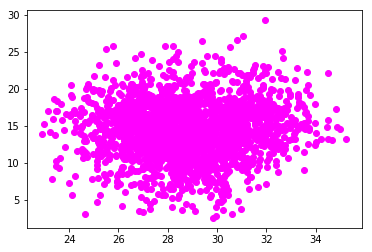

In [46]:
plt.scatter(X,y, color = "magenta")

## Remove outliers

In [47]:
joined_data_clean = joined_data.loc[(joined_data["pig_lying"] < 19) & 
                                (joined_data["pig_lying"] > 3)]
X = joined_data_clean["lying_temp"]
y = joined_data_clean["pig_lying"]
y.size

1920

In [48]:
X1 = sm.add_constant(X)
#X1 = X

model1 = sm.OLS(y, X1).fit()
prediction1 = model1.predict(X1)

m1 = model1.params.lying_temp
b1 = model1.params.const
print("formula: y = {0}x + {1}".format(m1, b1) )

formula: y = 0.05149101319779588x + 12.333892414133064


In [49]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pig_lying   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.335
Date:                Sun, 17 Feb 2019   Prob (F-statistic):              0.127
Time:                        22:20:40   Log-Likelihood:                -4944.1
No. Observations:                1920   AIC:                             9892.
Df Residuals:                    1918   BIC:                             9903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3339      0.971     12.702      0.000      10.430      14.238
lying_temp     0.0515      0.034      1.528      0.127      -0.015       0.118
==============================================================================
Omnibus:                      123.435   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.054
Skew:                          -0.676   Prob(JB):                     1.17e-32
Kurtosis:                       3.096   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model1.params

const         12.333892
lying_temp     0.051491
dtype: float64

Text(0,0.5,'y')

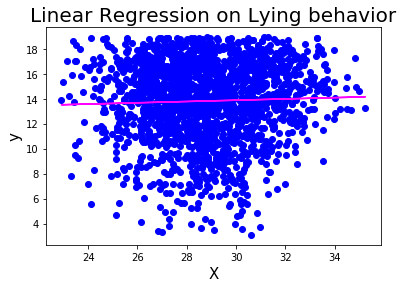

In [51]:
plt.scatter(X,y, color = "blue")
plt.plot(X, prediction1, color = "magenta")
plt.title("Linear Regression on Lying behavior", fontsize = 20)
plt.xlabel("X", fontsize = 15)
plt.ylabel("y", fontsize = 15)

In [52]:
X = pd.DataFrame(joined_data_clean["lying_temp"])
y = pd.DataFrame(joined_data_clean["pig_lying"])

In [53]:
lm = linear_model.LinearRegression()
model2 = lm.fit(X,y)
prediction2 = model2.predict(X)
m2 = model2.coef_[0]
b2 = model2.intercept_
print("formula: y = {0}x + {1}".format(m2, b2) )

formula: y = [0.05149101]x + [12.33389241]


Text(0,0.5,'y')

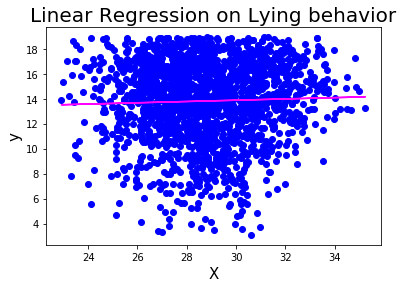

In [54]:
plt.scatter(X,y, color = "blue")
plt.plot(X, prediction2, color = "magenta")
plt.title("Linear Regression on Lying behavior", fontsize = 20)
plt.xlabel("X", fontsize = 15)
plt.ylabel("y", fontsize = 15)